Still problems in all the cleaning processess (!fix needed!)

**AMAZON SALES DATA**

In [2]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [22]:
%pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 5.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.1 MB 3.5 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.1 MB 3.7 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.1 MB 3.3 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/11.1 MB 3.3 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.1 MB 3.4 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 3.4 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.1 MB 3.4 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.1 MB 3.4 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.1 MB 3.4 MB/s eta 0:00:02
   ----------------------------- ---------- 8.1/11.1 MB 3.4 MB/s eta 0:00:01
   -----------------

In [3]:
import pandas as pd

In [4]:
amazon=pd.read_csv("data/Amazon Sale Report.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/Amazon Sale Report.csv'

In [ ]:
print(amazon.shape)

(128975, 23)


In [ ]:
print(amazon.head())

   index             Order_ID Order_Date                  Order_Status  \
0      0  405-8078784-5731545  4/30/2022                     Cancelled   
1      1  171-9198151-1101146  4/30/2022  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  4/30/2022                       Shipped   
3      3  403-9615377-8133951  4/30/2022                     Cancelled   
4      4  407-1069790-7240320  4/30/2022                       Shipped   

  Fulfillment_Type Sales_Channel Shipping_Service_Level Product_Style  \
0         Merchant     Amazon.in               Standard        SET389   
1         Merchant     Amazon.in               Standard       JNE3781   
2           Amazon     Amazon.in              Expedited       JNE3371   
3         Merchant     Amazon.in               Standard         J0341   
4           Amazon     Amazon.in              Expedited       JNE3671   

       Product_SKU Product_Category  ... Quantity Currency Sale_Amount  \
0   SET389-KR-NP-S              Set  ...  

In [ ]:
print(amazon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   128975 non-null  int64  
 1   Order_ID                128975 non-null  object 
 2   Order_Date              128975 non-null  object 
 3   Order_Status            128975 non-null  object 
 4   Fulfillment_Type        128975 non-null  object 
 5   Sales_Channel           128975 non-null  object 
 6   Shipping_Service_Level  128975 non-null  object 
 7   Product_Style           128975 non-null  object 
 8   Product_SKU             128975 non-null  object 
 9   Product_Category        128975 non-null  object 
 10  Product_Size            128975 non-null  object 
 11  Amazon_Standard_ID      128975 non-null  object 
 12  Courier_Status          122103 non-null  object 
 13  Quantity                128975 non-null  int64  
 14  Currency            

In [ ]:
amazon.dtypes

index                       int64
Order_ID                   object
Order_Date                 object
Order_Status               object
Fulfillment_Type           object
Sales_Channel              object
Shipping_Service_Level     object
Product_Style              object
Product_SKU                object
Product_Category           object
Product_Size               object
Amazon_Standard_ID         object
Courier_Status             object
Quantity                    int64
Currency                   object
Sale_Amount               float64
Shipping_City              object
Shipping_State             object
Shipping_Postal_Code      float64
Shipping_Country           object
Promotion_IDs              object
Business_to_Business         bool
Fulfilled_By               object
dtype: object

In [ ]:
print(amazon.isnull().sum())

index                         0
Order_ID                      0
Order_Date                    0
Order_Status                  0
Fulfillment_Type              0
Sales_Channel                 0
Shipping_Service_Level        0
Product_Style                 0
Product_SKU                   0
Product_Category              0
Product_Size                  0
Amazon_Standard_ID            0
Courier_Status             6872
Quantity                      0
Currency                   7795
Sale_Amount                7795
Shipping_City                33
Shipping_State               33
Shipping_Postal_Code         33
Shipping_Country             33
Promotion_IDs             49153
Business_to_Business          0
Fulfilled_By              89698
dtype: int64


Finding Percentage of missing values in each column

In [ ]:
missing_percentage = amazon.isnull().sum() / len(amazon) * 100
print(missing_percentage)

index                      0.000000
Order_ID                   0.000000
Order_Date                 0.000000
Order_Status               0.000000
Fulfillment_Type           0.000000
Sales_Channel              0.000000
Shipping_Service_Level     0.000000
Product_Style              0.000000
Product_SKU                0.000000
Product_Category           0.000000
Product_Size               0.000000
Amazon_Standard_ID         0.000000
Courier_Status             5.328164
Quantity                   0.000000
Currency                   6.043807
Sale_Amount                6.043807
Shipping_City              0.025586
Shipping_State             0.025586
Shipping_Postal_Code       0.025586
Shipping_Country           0.025586
Promotion_IDs             38.110487
Business_to_Business       0.000000
Fulfilled_By              69.546811
dtype: float64


Dropping Columns with large percentage of missing values

In [ ]:
amazon.drop('Fulfilled_By', axis=1, inplace=True)

In [ ]:
amazon.drop('Promotion_IDs', axis=1, inplace=True)

Imputation of missing values for remaing columns (int, float)

In [7]:
def fill_na_based_on_skew(df, column):
    skewness = df[column].skew()

    if abs(skewness) > 1: 
        df[column].fillna(df[column].median(), inplace=True)
    else: 
        df[column].fillna(df[column].mean(), inplace=True)

In [ ]:
fill_na_based_on_skew(amazon, 'Sale_Amount')

C:\Users\HP\AppData\Local\Temp\ipykernel_12396\3934627601.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


Imputation of missing values for Categorical Columns

In [8]:
def fill_categorical_missing(df, categorical_columns):
    total_rows = len(df)

    for col in categorical_columns:
        unique_count = df[col].nunique()
        cardinality_ratio = unique_count / total_rows  

        if cardinality_ratio < 0.05:  
            df[col].fillna(df[col].mode()[0], inplace=True)

        elif 0.05 <= cardinality_ratio <= 0.20:  
            if df[col].mode()[0] != "Unknown":  
                df[col].fillna(df[col].mode()[0], inplace=True)
            else:
                df[col].fillna("Unknown", inplace=True)

        else: 
            df[col].fillna("Unknown", inplace=True)

    return df

In [ ]:
def check_unique_values(df, column):
    print(f"Unique values in '{column}':")
    unique_values = df[column].dropna().unique() 
    for value in sorted(unique_values):
        print(repr(value)) 
    print(f"\nTotal unique values: {len(unique_values)}")

check_unique_values(amazon, 'Shipping_State')   

Unique values in 'Shipping_State':
'ANDAMAN & NICOBAR '
'ANDHRA PRADESH'
'APO'
'AR'
'ARUNACHAL PRADESH'
'ASSAM'
'Arunachal Pradesh'
'Arunachal pradesh'
'BIHAR'
'Bihar'
'CHANDIGARH'
'CHHATTISGARH'
'Chandigarh'
'DADRA AND NAGAR'
'DELHI'
'Delhi'
'GOA'
'Goa'
'Gujarat'
'HARYANA'
'HIMACHAL PRADESH'
'JAMMU & KASHMIR'
'JHARKHAND'
'KARNATAKA'
'KERALA'
'LADAKH'
'LAKSHADWEEP'
'MADHYA PRADESH'
'MAHARASHTRA'
'MANIPUR'
'MEGHALAYA'
'MIZORAM'
'Manipur'
'Meghalaya'
'Mizoram'
'NAGALAND'
'NL'
'Nagaland'
'New Delhi'
'ODISHA'
'Odisha'
'Orissa'
'PB'
'PUDUCHERRY'
'PUNJAB'
'Pondicherry'
'Puducherry'
'Punjab'
'Punjab/Mohali/Zirakpur'
'RAJASTHAN'
'RJ'
'Rajasthan'
'Rajshthan'
'Rajsthan'
'SIKKIM'
'Sikkim'
'TAMIL NADU'
'TELANGANA'
'TRIPURA'
'UTTAR PRADESH'
'UTTARAKHAND'
'WEST BENGAL'
'bihar'
'delhi'
'goa'
'orissa'
'punjab'
'rajasthan'
'rajsthan'

Total unique values: 69


In [ ]:
print(amazon[amazon['Shipping_State'] == 'AR']['Shipping_City'].unique())
print(amazon[amazon['Shipping_State'] == 'APO']['Shipping_City'].unique())
print(amazon[amazon['Shipping_State'] == 'NL']['Shipping_City'].unique())
print(amazon[amazon['Shipping_State'] == 'PB']['Shipping_City'].unique())
print(amazon[amazon['Shipping_State'] == 'RJ']['Shipping_City'].unique())

['ITANAGAR']
['APO']
['DIMAPUR']
['ZIRA']
['JAIPUR' 'JODHPUR']


In [ ]:
state_replacements = {
    'ANDAMAN & NICOBAR ': 'ANDAMAN & NICOBAR',
    'Arunachal Pradesh': 'ARUNACHAL PRADESH',
    'Arunachal pradesh': 'ARUNACHAL PRADESH',
    'Bihar': 'BIHAR',
    'Chandigarh': 'CHANDIGARH',
    'Delhi': 'DELHI',
    'Goa': 'GOA',
    'Gujarat': 'GUJARAT',
    'Manipur': 'MANIPUR',
    'Meghalaya': 'MEGHALAYA',
    'Mizoram': 'MIZORAM',
    'NL': 'NAGALAND',
    'Nagaland': 'NAGALAND',
    'New Delhi': 'DELHI',
    'Odisha': 'ODISHA',
    'Orissa': 'ODISHA',
    'PB': 'PUNJAB',
    'Pondicherry': 'PUDUCHERRY',
    'Puducherry': 'PUDUCHERRY',
    'Punjab': 'PUNJAB',
    'Punjab/Mohali/Zirakpur': 'PUNJAB',
    'RJ': 'RAJASTHAN',
    'Rajasthan': 'RAJASTHAN',
    'Rajshthan': 'RAJASTHAN',
    'Rajsthan': 'RAJASTHAN',
    'Sikkim': 'SIKKIM',
    'bihar': 'BIHAR',
    'delhi': 'DELHI',
    'goa': 'GOA',
    'orissa': 'ODISHA',
    'punjab': 'PUNJAB',
    'rajasthan': 'RAJASTHAN',
    'rajsthan': 'RAJASTHAN',
    'AR': 'ARUNACHAL PRADESH'
}

amazon['Shipping_State'] = amazon['Shipping_State'].replace(state_replacements)

amazon = amazon[~amazon['Shipping_State'].isin(['APO'])]

In [ ]:
categorical_cols=['Courier_Status','Currency','Shipping_State']

fill_categorical_missing(amazon, categorical_cols)

C:\Users\HP\AppData\Local\Temp\ipykernel_12396\3297095365.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,index,Order_ID,Order_Date,Order_Status,Fulfillment_Type,Sales_Channel,Shipping_Service_Level,Product_Style,Product_SKU,Product_Category,...,Amazon_Standard_ID,Courier_Status,Quantity,Currency,Sale_Amount,Shipping_City,Shipping_State,Shipping_Postal_Code,Shipping_Country,Business_to_Business
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,B09KXVBD7Z,Shipped,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,B099NRCT7B,Shipped,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,B098112V2V,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False
128971,128971,402-9551604-7544318,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,B09VC6KHX8,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False
128972,128972,407-9547469-3152358,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,B0982YZ51B,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False
128973,128973,402-6184140-0545956,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,B0894Y2NJQ,Shipped,1,INR,1199.00,Halol,GUJARAT,389350.0,IN,False


In [ ]:
amazon['Shipping_Country'].fillna('IN', inplace=True)

print(amazon['Shipping_Country'].isnull().sum())


0


C:\Users\HP\AppData\Local\Temp\ipykernel_12396\245673599.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon['Shipping_Country'].fillna('IN', inplace=True)


Imputation for "Shipping_City" and "Shipping_Postal_Code"

In [9]:
def fill_missing_mode(group):
    mode_value = group.mode()
    return group.fillna(mode_value.iloc[0] if not mode_value.empty else 'Unknown')

In [ ]:
amazon['Shipping_City'] = amazon.groupby('Shipping_State')['Shipping_City'].transform(fill_missing_mode)

In [ ]:
amazon['Shipping_Postal_Code'] = amazon['Shipping_Postal_Code'].astype(str)

print(amazon[amazon['Shipping_City'].isnull()])

amazon['Shipping_Postal_Code'] = amazon.groupby(['Shipping_City', 'Shipping_State'])['Shipping_Postal_Code'].transform(fill_missing_mode)

print(amazon[amazon['Shipping_City'].notnull() & amazon['Shipping_State'].notnull() & amazon['Shipping_Postal_Code'].isnull()])


Empty DataFrame
Columns: [index, Order_ID, Order_Date, Order_Status, Fulfillment_Type, Sales_Channel, Shipping_Service_Level, Product_Style, Product_SKU, Product_Category, Product_Size, Amazon_Standard_ID, Courier_Status, Quantity, Currency, Sale_Amount, Shipping_City, Shipping_State, Shipping_Postal_Code, Shipping_Country, Business_to_Business]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [index, Order_ID, Order_Date, Order_Status, Fulfillment_Type, Sales_Channel, Shipping_Service_Level, Product_Style, Product_SKU, Product_Category, Product_Size, Amazon_Standard_ID, Courier_Status, Quantity, Currency, Sale_Amount, Shipping_City, Shipping_State, Shipping_Postal_Code, Shipping_Country, Business_to_Business]
Index: []

[0 rows x 21 columns]


In [ ]:
import re
def identify_date_format(date):
    date = str(date).strip() 
    
    if re.match(r'^\d{2}-\d{2}-\d{4}$', date): 
        return 'MM-DD-YYYY'
    elif re.match(r'^\d{1,2}/\d{1,2}/\d{4}$', date): 
        return 'M/D/YYYY'
    elif re.match(r'^\d{4}-\d{2}-\d{2}$', date): 
        return 'YYYY-MM-DD'
    elif re.match(r'^\d{1,2}-\d{1,2}-\d{2}$', date):  
        return 'MM-DD-YY'
    elif date.lower() in ['nan', 'nat', 'none', '']:  
        return 'MISSING'
    else:
        return 'UNKNOWN FORMAT'

amazon['Date_Format'] = amazon['Order_Date'].apply(identify_date_format)

format_counts = amazon['Date_Format'].value_counts()
print(format_counts)

Date_Format
M/D/YYYY          73866
UNKNOWN FORMAT    55108
Name: count, dtype: int64


In [ ]:
print(amazon[amazon['Date_Format'] == 'UNKNOWN FORMAT']['Order_Date'].sample(20, random_state=42))

41231     04/05/22
31146     04/12/22
31315     04/12/22
87975     05/02/22
89103     05/02/22
73007     05/12/22
86592     05/03/22
126969    06/02/22
125633    06/03/22
41078     04/06/22
113797    06/11/22
111259    06/12/22
88373     05/02/22
85940     05/03/22
80742     05/06/22
127714    06/01/22
79972     05/07/22
87999     05/02/22
34809     04/09/22
85972     05/03/22
Name: Order_Date, dtype: object


In [ ]:
def fix_short_year_format(date):
    date = str(date).strip() 
    if re.match(r'^\d{1,2}/\d{1,2}/\d{2}$', date):  
        return pd.to_datetime(date, format='%m/%d/%y').strftime('%#m/%#d/%Y') 
    return date  

amazon['Order_Date'] = amazon['Order_Date'].apply(fix_short_year_format)



In [ ]:
import re
def identify_date_format(date):
    date = str(date).strip() 
    
    if re.match(r'^\d{2}-\d{2}-\d{4}$', date): 
        return 'MM-DD-YYYY'
    elif re.match(r'^\d{1,2}/\d{1,2}/\d{4}$', date): 
        return 'M/D/YYYY'
    elif re.match(r'^\d{4}-\d{2}-\d{2}$', date): 
        return 'YYYY-MM-DD'
    elif re.match(r'^\d{1,2}-\d{1,2}-\d{2}$', date):  
        return 'MM-DD-YY'
    elif date.lower() in ['nan', 'nat', 'none', '']:  
        return 'MISSING'
    else:
        return 'UNKNOWN FORMAT'

amazon['Date_Format'] = amazon['Order_Date'].apply(identify_date_format)

format_counts = amazon['Date_Format'].value_counts()
print(format_counts)

Date_Format
M/D/YYYY    128974
Name: count, dtype: int64


In [ ]:
amazon['Order_Date'] = pd.to_datetime(amazon['Order_Date'], format='%m/%d/%Y', errors='raise')

In [ ]:
print(amazon.isnull().sum())

index                     0
Order_ID                  0
Order_Date                0
Order_Status              0
Fulfillment_Type          0
Sales_Channel             0
Shipping_Service_Level    0
Product_Style             0
Product_SKU               0
Product_Category          0
Product_Size              0
Amazon_Standard_ID        0
Courier_Status            0
Quantity                  0
Currency                  0
Sale_Amount               0
Shipping_City             0
Shipping_State            0
Shipping_Postal_Code      0
Shipping_Country          0
Business_to_Business      0
Date_Format               0
dtype: int64


In [ ]:
amazon.drop(columns=['Date_Format'], inplace=True)

In [ ]:
print(amazon.duplicated().sum())

0


In [ ]:
amazon.dtypes

index                              int64
Order_ID                          object
Order_Date                datetime64[ns]
Order_Status                      object
Fulfillment_Type                  object
Sales_Channel                     object
Shipping_Service_Level            object
Product_Style                     object
Product_SKU                       object
Product_Category                  object
Product_Size                      object
Amazon_Standard_ID                object
Courier_Status                    object
Quantity                           int64
Currency                          object
Sale_Amount                      float64
Shipping_City                     object
Shipping_State                    object
Shipping_Postal_Code              object
Shipping_Country                  object
Business_to_Business                bool
dtype: object

In [ ]:
print(amazon['Sale_Amount'].mean())

648.5614647631622


In [ ]:
amazon.to_csv('amazon_mod.csv', index=False)

In [ ]:
from IPython.display import FileLink

In [ ]:
FileLink('amazon_mod.csv')

c:\Users\HP\OneDrive\Desktop\Dataviz\data_viz_project_iitm\amazon_mod.csv

**Sales Trends Over Time**

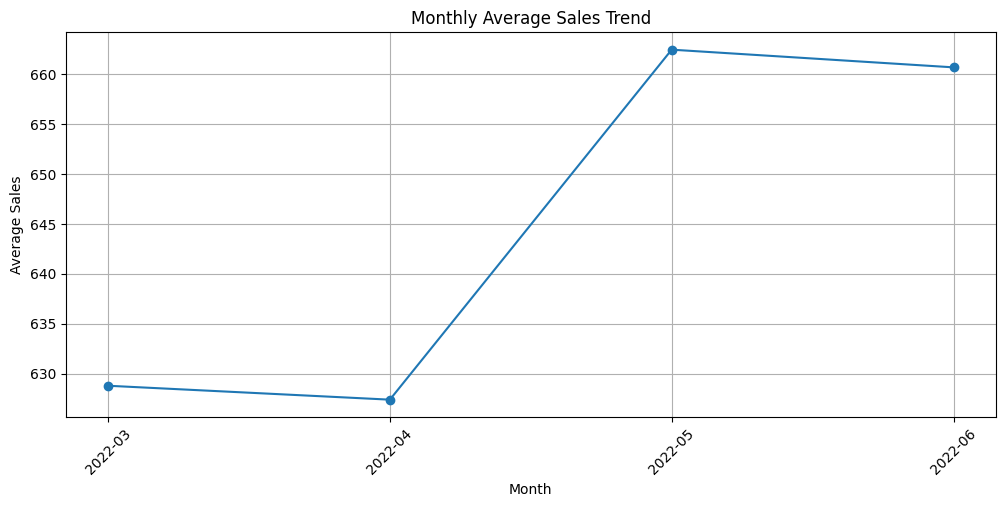

In [ ]:
import matplotlib.pyplot as plt

monthly_avg_sales = amazon.groupby(amazon['Order_Date'].dt.to_period("M"))['Sale_Amount'].mean()

plt.figure(figsize=(12, 5))
plt.plot(monthly_avg_sales.index.astype(str), monthly_avg_sales.values, marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.title("Monthly Average Sales Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Average Order Value (AOV) for each item**

C:\Users\HP\AppData\Local\Temp\ipykernel_15480\2871247290.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_avg_categories.values, y=top_avg_categories.index, palette="viridis")


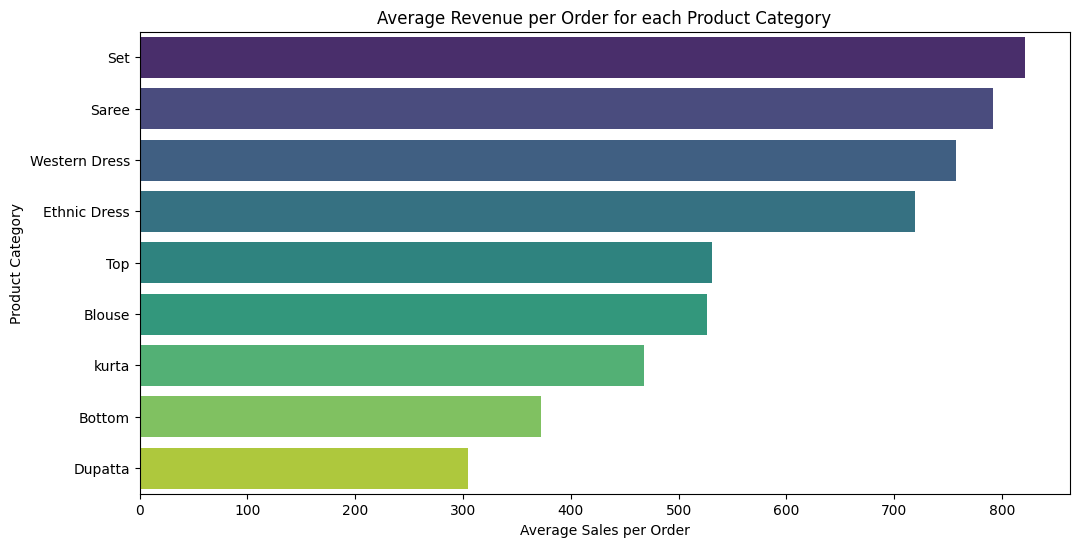

In [ ]:
import seaborn as sns

top_avg_categories = amazon.groupby('Product_Category')['Sale_Amount'].mean().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_avg_categories.values, y=top_avg_categories.index, palette="viridis")
plt.xlabel("Average Sales per Order")
plt.ylabel("Product Category")
plt.title("Average Revenue per Order for each Product Category")
plt.show()

**State-Wise Order Distribution**

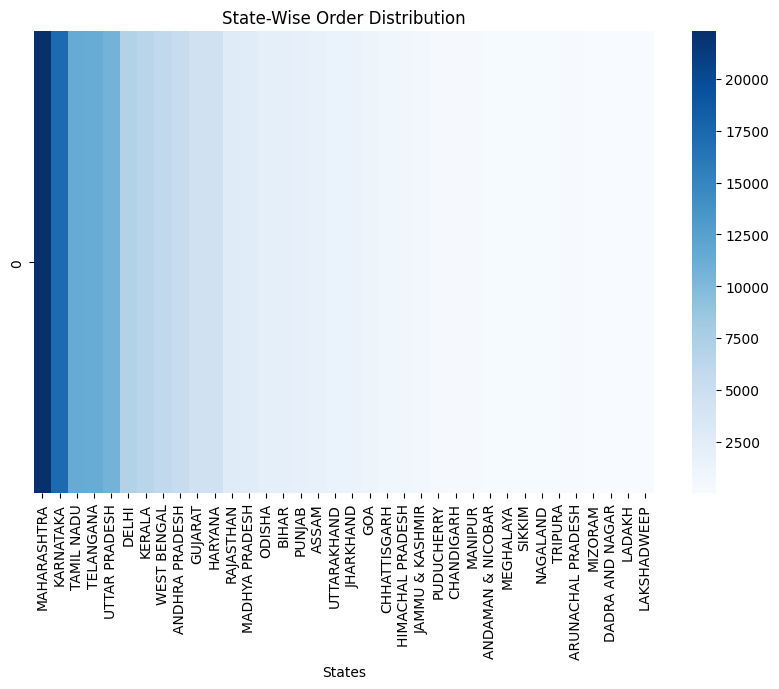

In [ ]:
import numpy as np

state_orders = amazon['Shipping_State'].value_counts()

plt.figure(figsize=(10, 6))
sns.heatmap(np.array([state_orders.values]), cmap="Blues", annot=False, fmt="d", xticklabels=state_orders.index)
plt.xlabel("States")
plt.title("State-Wise Order Distribution")
plt.xticks(rotation=90)
plt.show()


**SALES REPORT**

In [5]:
sales=pd.read_csv("data/Original CSV/Sale Report.csv")

In [ ]:
sales.dtypes

index                 int64
Product_SKU          object
Design_Number        object
Stock_Level         float64
Product_Category     object
Product_Size         object
Product_Color        object
dtype: object

In [ ]:
print(sales.isnull().sum())

index                0
Product_SKU         83
Design_Number       36
Stock_Level         36
Product_Category    45
Product_Size        36
Product_Color       45
dtype: int64


In [ ]:
missing_percentage = sales.isnull().sum() / len(sales) * 100
print(missing_percentage)

index               0.000000
Product_SKU         0.895265
Design_Number       0.388308
Stock_Level         0.388308
Product_Category    0.485385
Product_Size        0.388308
Product_Color       0.485385
dtype: float64


In [10]:
fill_na_based_on_skew(sales, 'Stock_Level')

C:\Users\HP\AppData\Local\Temp\ipykernel_3384\3934627601.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [ ]:
check_unique_values(sales, 'Product_Category')

NameError: name 'check_unique_values' is not defined

In [11]:
categorical_cols=['Product_Category','Product_Size','Product_Color']

fill_categorical_missing(sales, categorical_cols)

C:\Users\HP\AppData\Local\Temp\ipykernel_3384\3297095365.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,index,Product_SKU,Design_Number,Stock_Level,Product_Category,Product_Size,Product_Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red
...,...,...,...,...,...,...,...
9266,9266,NaN,NaN,8.0,KURTA,S,Blue
9267,9267,NaN,NaN,8.0,KURTA,S,Blue
9268,9268,NaN,NaN,8.0,KURTA,S,Blue
9269,9269,NaN,NaN,8.0,KURTA,S,Blue


In [12]:
sales['Product_SKU'] = sales.groupby('Product_Category')['Product_SKU'].transform(fill_missing_mode)
sales['Design_Number'] = sales.groupby('Product_Category')['Design_Number'].transform(fill_missing_mode)

print(sales[sales['Product_Category'].notnull() & sales['Product_SKU'].isnull()])
print(sales[sales['Product_Category'].notnull() & sales['Design_Number'].isnull()])

Empty DataFrame
Columns: [index, Product_SKU, Design_Number, Stock_Level, Product_Category, Product_Size, Product_Color]
Index: []
Empty DataFrame
Columns: [index, Product_SKU, Design_Number, Stock_Level, Product_Category, Product_Size, Product_Color]
Index: []


In [13]:
sales['Stock_Level'] = sales['Stock_Level'].astype(int)

In [14]:
print(sales.isnull().sum())

index               0
Product_SKU         0
Design_Number       0
Stock_Level         0
Product_Category    0
Product_Size        0
Product_Color       0
dtype: int64


In [15]:
ref_count = (sales['Product_SKU'] == '#REF!').sum()

print(f"Number of rows with Product_SKU as '#REF!': {ref_count}")

Number of rows with Product_SKU as '#REF!': 22


In [16]:
blouse_mode = sales.loc[sales['Product_Category'] == 'BLOUSE', 'Product_SKU'].mode()
print(f"Mode of Product_SKU when Product_Category is 'BLOUSE': {blouse_mode.tolist()}")

Mode of Product_SKU when Product_Category is 'BLOUSE': ['#REF!']


In [17]:
ref_count_blouse = (sales['Product_Category'] == 'BLOUSE')
print(f"Number of '#REF!' in Product_SKU when Product_Category is 'BLOUSE': {ref_count_blouse.sum()}")

Number of '#REF!' in Product_SKU when Product_Category is 'BLOUSE': 241


In [18]:
sales = sales[sales['Product_SKU'] != '#REF!']

In [19]:
print(sales.duplicated().sum())

0


In [20]:
sales.dtypes

index                int64
Product_SKU         object
Design_Number       object
Stock_Level          int64
Product_Category    object
Product_Size        object
Product_Color       object
dtype: object

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define features (X) and target (y)
X = sales.drop('Stock_Level', axis=1)
y = sales['Stock_Level']

X = pd.get_dummies(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

KeyboardInterrupt: 

In [ ]:
sales.to_csv('sales_mod.csv', index=False)

In [ ]:
FileLink('sales_mod.csv')

c:\Users\HP\OneDrive\Desktop\Dataviz\data_viz_project_iitm\sales_mod.csv

**EXPENSE IIGF**

In [ ]:
exp=pd.read_csv('data/Expense IIGF-mod1.csv')

In [ ]:
print(exp.isnull().sum())

index              0
Received_Date      0
Received_Amount    0
Particular         0
Expense_Amount     0
dtype: int64


In [ ]:
exp.dtypes

index                       int64
Received_Date      datetime64[ns]
Received_Amount             int64
Particular                 object
Expense_Amount              int64
dtype: object

In [ ]:
exp['Received_Date'] = pd.to_datetime(exp['Received_Date'], format='%m/%d/%Y', errors='coerce')

In [ ]:
exp.to_csv('exp_mod.csv', index=False)

In [ ]:
FileLink('exp_mod.csv')

c:\Users\HP\OneDrive\Desktop\Dataviz\data_viz_project_iitm\exp_mod.csv

**MAY-2022**

In [ ]:
maydata=pd.read_csv("data/May-2022.csv")

In [ ]:
cols_to_convert = maydata.columns[5:]
maydata[cols_to_convert] = maydata[cols_to_convert].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0).astype(int)

In [ ]:
maydata.dtypes

index                int64
Product_SKU         object
Product_Style_ID    object
Product_Catalog     object
Product_Category    object
Product_Weight       int64
Transfer_Price       int64
Old_MRP              int64
Final_Old_MRP        int64
Ajio_MRP             int64
Amazon_MRP           int64
Amazon_FBA_MRP       int64
Flipkart_MRP         int64
Limeroad_MRP         int64
Myntra_MRP           int64
Paytm_MRP            int64
Snapdeal_MRP         int64
dtype: object

In [ ]:
print(maydata.isnull().sum())

index               0
Product_SKU         0
Product_Style_ID    0
Product_Catalog     0
Product_Category    0
Product_Weight      0
Transfer_Price      0
Old_MRP             0
Final_Old_MRP       0
Ajio_MRP            0
Amazon_MRP          0
Amazon_FBA_MRP      0
Flipkart_MRP        0
Limeroad_MRP        0
Myntra_MRP          0
Paytm_MRP           0
Snapdeal_MRP        0
dtype: int64


In [ ]:
print(maydata.duplicated().sum())

0


**INTERNATIONAL SALE REPORT (to be done)**

In [ ]:
intsale=pd.read_csv("data/International sale Report.csv")

In [ ]:
print(intsale.isnull().sum())

index                    0
Sale_Date                1
Sale_Month              25
Customer_Name         1040
Product_Style         1040
Product_SKU           2474
Product_Size          1040
Quantity_Purchased    1040
Price_per_Unit        1040
Gross_Amount          1040
dtype: int64


In [ ]:
intsale.dtypes

index                  int64
Sale_Date             object
Sale_Month            object
Customer_Name         object
Product_Style         object
Product_SKU           object
Product_Size          object
Quantity_Purchased    object
Price_per_Unit        object
Gross_Amount          object
dtype: object

In [ ]:
intsale['Quantity_Purchased'] = pd.to_numeric(intsale['Quantity_Purchased'], errors='coerce')

intsale['Price_per_Unit'] = pd.to_numeric(intsale['Price_per_Unit'].str.replace(',', ''), errors='coerce')
intsale['Gross_Amount'] = pd.to_numeric(intsale['Gross_Amount'].str.replace(',', ''), errors='coerce')

fill_na_based_on_skew(intsale, 'Quantity_Purchased')
fill_na_based_on_skew(intsale, 'Price_per_Unit')
fill_na_based_on_skew(intsale, 'Gross_Amount')

intsale['Quantity_Purchased'] = intsale['Quantity_Purchased'].astype(int)



C:\Users\HP\AppData\Local\Temp\ipykernel_15480\3934627601.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15480\3934627601.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [ ]:
intsale['Product_SKU'] = fill_missing_mode(intsale['Product_SKU'])

categorical_columns = ['Customer_Name', 'Product_Style', 'Product_Size']
fill_categorical_missing(intsale,categorical_columns)


C:\Users\HP\AppData\Local\Temp\ipykernel_15480\3297095365.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,index,Sale_Date,Sale_Month,Customer_Name,Product_Style,Product_SKU,Product_Size,Quantity_Purchased,Price_per_Unit,Gross_Amount
0,0,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1,616.56,617.0
1,1,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1,616.56,617.0
2,2,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1,616.56,617.0
3,3,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1,616.56,617.0
4,4,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1,616.56,617.0
...,...,...,...,...,...,...,...,...,...,...
37427,37427,AVIN,3/31/2022,22-Mar,PJNE3423,PJNE3423-KR-4XL,1,537,538.00,4.0
37428,37428,AVIN,3/31/2022,22-Mar,PJNE3404,PJNE3404-KR-4XL,1,500,500.00,5.0
37429,37429,AVIN,3/31/2022,22-Mar,PJNE3423,PJNE3423-KR-4XL,1,537,538.00,4.0
37430,37430,AVIN,3/31/2022,22-Mar,SET290,SET290-KR-DPT-M,1,812,812.00,7.0


In [ ]:
intsale['Date_Format'] = intsale['Sale_Date'].apply(identify_date_format)

format_counts = intsale['Date_Format'].value_counts()
print(format_counts)

Date_Format
UNKNOWN FORMAT    18796
M/D/YYYY          18635
MISSING               1
Name: count, dtype: int64
